# Task 1: 
### Do the following:
###  1. Transform each stock prices time series to daily returns by using the daily returns formula Rt =(Pt - P(t-1))/Pt-1; where Rt and Pt are the return and price, respectively, at day t.

In [45]:
import pandas as pd
import string

#function to get returns
def get_returns(df,file):
    i=0
    for index, row in df.iterrows():
        if i==0:
            previous = row['Close']
            df.set_value(index,'Return',0)
        else:
            ret = (row['Close']-previous)/(previous)
            previous = row['Close']
            df.set_value(index,'Return',ret)
        i=1
    df=df.rename(columns = {'Date':'Date_'+file,'Close':'Close_'+file,'Return':'Return_'+file})
    return df
 

filelist=('AAPL.csv','AET.csv','APCxlsx.csv','AXP.csv','BAC.csv','BMY.csv','COF.csv','F.csv','KO.csv','GOOG.csv','HON.csv','IBM.csv','OKE.csv','T.csv','UPS.csv')
i=0
for File in filelist:
    df=pd.read_csv(File)
    print(File)
    File=str.replace(File, '.csv', '')
    df=get_returns(df,File)
    
    if i==0:
        df_freturn=df
    else:
        df_freturn=pd.concat([df_freturn, df], axis=1)
    i+=1
    
print(df_freturn.head())
print(df_freturn.columns)





AAPL.csv
AET.csv
APCxlsx.csv
AXP.csv
BAC.csv
BMY.csv
COF.csv
F.csv
KO.csv
GOOG.csv
HON.csv
IBM.csv
OKE.csv
T.csv
UPS.csv
  Date_AAPL  Close_AAPL  Return_AAPL  Date_AET  Close_AET  Return_AET  \
0  1/3/2012   58.747143     0.000000  1/3/2012  42.400002    0.000000   
1  1/4/2012   59.062859     0.005374  1/4/2012  43.200001    0.018868   
2  1/5/2012   59.718571     0.011102  1/5/2012  43.630001    0.009954   
3  1/6/2012   60.342857     0.010454  1/6/2012  44.070000    0.010085   
4  1/9/2012   60.247143    -0.001586  1/9/2012  44.139999    0.001588   

  Date_APCxlsx  Close_APCxlsx  Return_APCxlsx  Date_AXP     ...      \
0     1/3/2012      78.650002        0.000000  1/3/2012     ...       
1     1/4/2012      79.769997        0.014240  1/4/2012     ...       
2     1/5/2012      80.800003        0.012912  1/5/2012     ...       
3     1/6/2012      80.269997       -0.006559  1/6/2012     ...       
4     1/9/2012      80.769997        0.006229  1/9/2012     ...       

   Return_IBM

###  2. Find the best normal fit to each of the stock daily return time series and use the Kolmogorov-Smirnov goodness of fit test to report how good is the "best fit".

In [46]:
from scipy.stats import kstest

fitlist=('AAPL','AET','APCxlsx','AXP','BAC','BMY','COF','F','KO','GOOG','HON','IBM','OKE','T','UPS')

for fit in fitlist:
    print('Kolmogorov-Smirnov goodness of fit test for stock:'+fit)
    stats,pvalue=kstest(df_freturn['Return_'+fit],'norm')
    print("pvalue:%.50f"% pvalue)


Kolmogorov-Smirnov goodness of fit test for stock:AAPL
pvalue:0.00000000000000000000000000000000000000000000000000
Kolmogorov-Smirnov goodness of fit test for stock:AET
pvalue:0.00000000000000000000000000000000000000000000000000
Kolmogorov-Smirnov goodness of fit test for stock:APCxlsx
pvalue:0.00000000000000000000000000000000000000000000000000
Kolmogorov-Smirnov goodness of fit test for stock:AXP
pvalue:0.00000000000000000000000000000000000000000000000000
Kolmogorov-Smirnov goodness of fit test for stock:BAC
pvalue:0.00000000000000000000000000000000000000000000000000
Kolmogorov-Smirnov goodness of fit test for stock:BMY
pvalue:0.00000000000000000000000000000000000000000000000000
Kolmogorov-Smirnov goodness of fit test for stock:COF
pvalue:0.00000000000000000000000000000000000000000000000000
Kolmogorov-Smirnov goodness of fit test for stock:F
pvalue:0.00000000000000000000000000000000000000000000000000
Kolmogorov-Smirnov goodness of fit test for stock:KO
pvalue:0.00000000000000000000000

###  3. For each stock draw a frequency graph overlaid by your best normal approximation to illustrate your fit.

Frequency graph overlaid by your best normal approximation for:AAPL


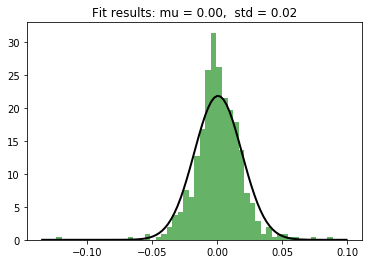

Frequency graph overlaid by your best normal approximation for:AET


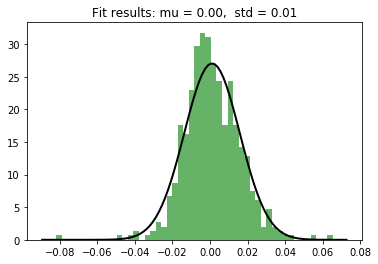

Frequency graph overlaid by your best normal approximation for:APCxlsx


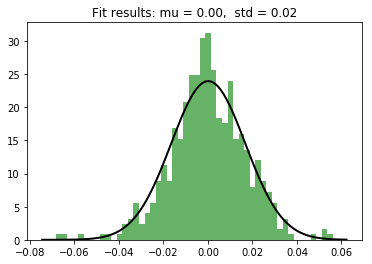

Frequency graph overlaid by your best normal approximation for:AXP


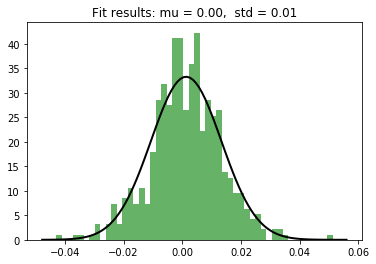

Frequency graph overlaid by your best normal approximation for:BAC


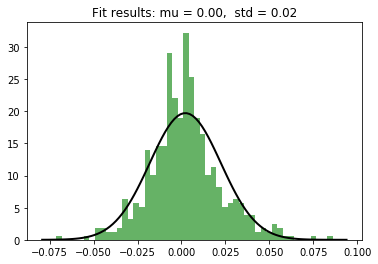

Frequency graph overlaid by your best normal approximation for:BMY


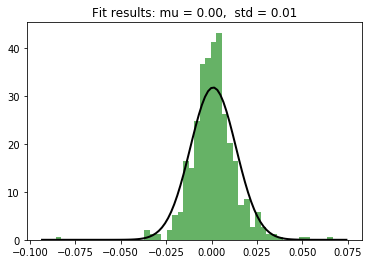

Frequency graph overlaid by your best normal approximation for:COF


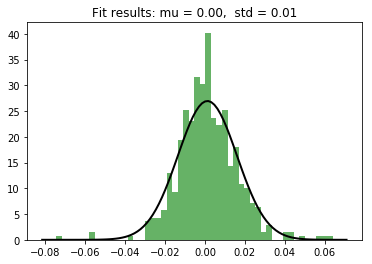

Frequency graph overlaid by your best normal approximation for:F


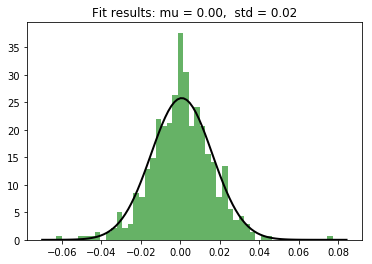

Frequency graph overlaid by your best normal approximation for:KO


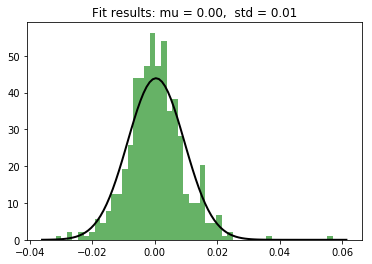

Frequency graph overlaid by your best normal approximation for:GOOG


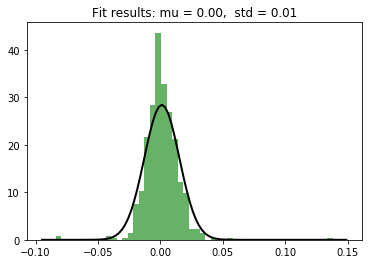

Frequency graph overlaid by your best normal approximation for:HON


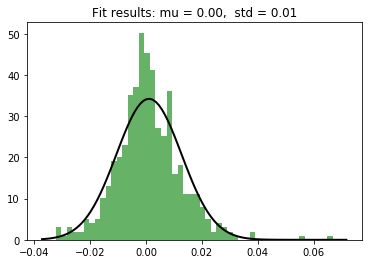

Frequency graph overlaid by your best normal approximation for:IBM


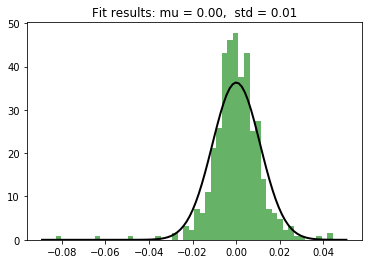

Frequency graph overlaid by your best normal approximation for:OKE


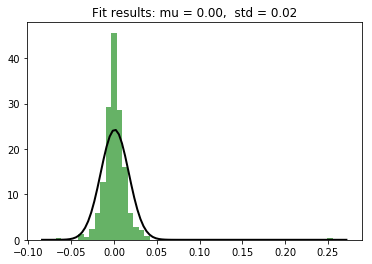

Frequency graph overlaid by your best normal approximation for:T


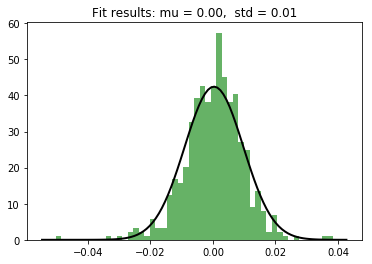

Frequency graph overlaid by your best normal approximation for:UPS


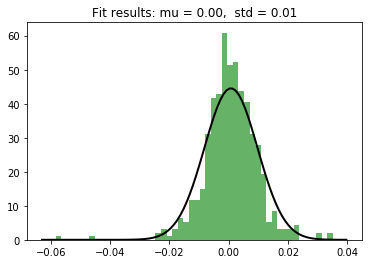

In [47]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

fitlist=('AAPL','AET','APCxlsx','AXP','BAC','BMY','COF','F','KO','GOOG','HON','IBM','OKE','T','UPS')

for fit in fitlist:
# Fit a normal distribution to the data:
    mu, std = norm.fit(df_freturn['Return_'+fit])
    
# Plot the histogram.
    plt.hist(df_freturn['Return_'+fit], bins=50, normed=True, alpha=0.6, color='g')

    
# Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    print('Frequency graph overlaid by your best normal approximation for:'+fit)
    plt.show()

###  4  Define in your code vectors W = (W1; : : : ;W15) of invested wealth, w = (w1; : : : ;w15) of investment weights where wi := Wi=W. Define also x = Ww = (Ww1; : : : ;Ww15), remember that W= Ww = x.   Hint: Use Scipy or Statsmodels to do the fitting and goodness of fit test. The text file useful links.txt included in the final project materials package has many links to examples n how to do this (including drawing the graphs).

###  5. Suppose that we have a total wealth W = 1;500;000 dollars. Let p0 be the initial investment position where all our wealth is invested evenly across the 15 assets. Then for p0 we have that Wi = 100;000 dollars for every asset i 2 f1; 2; : : : ; 15g.

In [48]:
#Total Wealth
Tot_W=1500000

#Portfolio
portfolio=(100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000)

#Final allocation proportions
Final_prop_alloc=[x/Tot_W for x in portfolio]

print('Final allocation proportions')
print(Final_prop_alloc)


Final allocation proportions
[0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667]


###  6. Calculate from the returns data the returns covariance matrix Summation.

In [49]:
fitlist=('AAPL','AET','APCxlsx','AXP','BAC','BMY','COF','F','KO','GOOG','HON','IBM','OKE','T','UPS')

i=0
for fit in fitlist:
     if i==0:
        df_cov=df_freturn['Return_'+fit]
     else:
        df_cov=pd.concat([df_cov,df_freturn['Return_'+fit]], axis=1)
        
     i+=1

#print(df_cov.head())

print(df_cov.cov())
    

                Return_AAPL  Return_AET  Return_APCxlsx  Return_AXP  \
Return_AAPL        0.000334    0.000033        0.000066    0.000055   
Return_AET         0.000033    0.000218        0.000072    0.000042   
Return_APCxlsx     0.000066    0.000072        0.000278    0.000098   
Return_AXP         0.000055    0.000042        0.000098    0.000144   
Return_BAC         0.000087    0.000080        0.000162    0.000126   
Return_BMY         0.000013    0.000048        0.000062    0.000056   
Return_COF         0.000071    0.000060        0.000109    0.000109   
Return_F           0.000078    0.000063        0.000108    0.000083   
Return_KO          0.000029    0.000033        0.000059    0.000049   
Return_GOOG        0.000065    0.000031        0.000060    0.000064   
Return_HON         0.000050    0.000062        0.000104    0.000083   
Return_IBM         0.000046    0.000033        0.000069    0.000035   
Return_OKE         0.000034    0.000038        0.000078    0.000059   
Return

# Task 2: 
###  Task 2: Given weights w, total wealth W, normal models, and covariance matrix (as obtained in Task 1), do the following:
### 1. Write a python function that calculates the mean and variance of the portfolio rate of returns. Test the function on the even position p0.

In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

fitlist=('AAPL','AET','APCxlsx','AXP','BAC','BMY','COF','F','KO','GOOG','HON','IBM','OKE','T','UPS')

mean=[]
for fit in fitlist:
# Fit a normal distribution to the data:
    mu, std = norm.fit(df_freturn['Return_'+fit])
    mean.append(mu)

print(mean)

fit_mu=np.random.multivariate_normal(mean,df_cov.cov(),502)
    
Fit_mu_even = [x/15 for x in fit_mu]

print(np.mean(Fit_mu_even))


print(np.var(Fit_mu_even))


[0.00078620611581036533, 0.0010672897489697355, 0.00015593992817332524, 0.0013247169693284091, 0.0021720455478908933, 0.00091093838004948724, 0.0012260280392598695, 0.00077060654022177407, 0.00036745060176107165, 0.0011367612721372784, 0.0010581373937979194, 7.4393304899258094e-05, 0.00082863195991519966, 0.00033541247262073643, 0.00073470323500221687]
9.32882067236e-05
8.71761693566e-07


2. Write a python function that obtains the portfolio rate of returns diversified VaR at 95%
confidence level (see definition of VaR and quantile). Here we use an fit such that on the
standard normal distribution the probability of observing a loss worse than fit is 95%.
Test the function on the even position p0.
3
3. Write a python function that calculates the individual VaR at 95% confidence level for a given
asset. Test the function on the even position p0.
4. Write a python function that calculates the undiversified VaR at 95% confidence level for a
given asset. Test the function on the even position p0.
5. Write a python function that calculates the benefit from diversification. Test the function on
the even position p0.

In [9]:
#Alpha at 95% CF is 1.65 for SND
alpha = 1.65

DiversifiedVaR=alpha*np.std(Fit_mu_even)*Tot_W
print(DiversifiedVaR)
fitlist=('AAPL','AET','APCxlsx','AXP','BAC','BMY','COF','F','KO','GOOG','HON','IBM','OKE','T','UPS')

std_var=[]
Div_VaR_stock={'key':'value'}
for fit in fitlist:
# Fit a normal distribution to the data:
    mu, std = norm.fit(df_freturn['Return_'+fit])
    std_var.append(std)
    Div_VaR_stock[fit+'_Div_VaR']=(std*(1/15)*Tot_W)
        
    #i+=1
del Div_VaR_stock['key']
print(Div_VaR_stock)

UnDiversifiedVaR=sum(Div_VaR_stock.values())
print('UnDiversifiedVaR:')
print(UnDiversifiedVaR)

benefit=DiversifiedVaR-UnDiversifiedVaR
print(benefit)

2310.86244163
{'AAPL_Div_VaR': 1825.3451885349621, 'AET_Div_VaR': 1474.4375130407773, 'APCxlsx_Div_VaR': 1665.5161289632006, 'AXP_Div_VaR': 1198.2970156224762, 'BAC_Div_VaR': 2021.4708721509608, 'BMY_Div_VaR': 1256.3617308308117, 'COF_Div_VaR': 1480.1237737944004, 'F_Div_VaR': 1546.8797468406065, 'KO_Div_VaR': 909.01385778639269, 'GOOG_Div_VaR': 1405.0240706336758, 'HON_Div_VaR': 1164.5041709619029, 'IBM_Div_VaR': 1098.671216251392, 'OKE_Div_VaR': 1645.2690327615576, 'T_Div_VaR': 940.09761086394531, 'UPS_Div_VaR': 895.83704734654873}
UnDiversifiedVaR:
20526.8489764
-18215.9865348


In [10]:

df_var12=df_cov.divide(15)
print(df_cov.head())



   Return_AAPL  Return_AET  Return_APCxlsx  Return_AXP  Return_BAC  \
0     0.000000    0.000000        0.000000    0.000000    0.000000   
1     0.005374    0.018868        0.014240   -0.003100    0.001724   
2     0.011102    0.009954        0.012912    0.011609    0.086059   
3     0.010454    0.010085       -0.006559   -0.010861   -0.020602   
4    -0.001586    0.001588        0.006229    0.002486    0.014563   

   Return_BMY  Return_COF  Return_F  Return_KO  Return_GOOG  Return_HON  \
0    0.000000    0.000000  0.000000   0.000000     0.000000    0.000000   
1   -0.019137    0.017143  0.015274  -0.006273     0.004313   -0.000900   
2   -0.005242    0.015281  0.025664  -0.004734    -0.013871    0.001080   
3    0.001756   -0.000443  0.010354  -0.006343    -0.013642   -0.007375   
4   -0.009059    0.024136  0.007686   0.000000    -0.042399    0.008336   

   Return_IBM  Return_OKE  Return_T  Return_UPS  
0    0.000000    0.000000  0.000000    0.000000  
1   -0.004079   -0.000801  0

In [11]:
print(df_var12.head())

   Return_AAPL  Return_AET  Return_APCxlsx  Return_AXP  Return_BAC  \
0     0.000000    0.000000        0.000000    0.000000    0.000000   
1     0.000358    0.001258        0.000949   -0.000207    0.000115   
2     0.000740    0.000664        0.000861    0.000774    0.005737   
3     0.000697    0.000672       -0.000437   -0.000724   -0.001373   
4    -0.000106    0.000106        0.000415    0.000166    0.000971   

   Return_BMY  Return_COF  Return_F  Return_KO  Return_GOOG  Return_HON  \
0    0.000000    0.000000  0.000000   0.000000     0.000000    0.000000   
1   -0.001276    0.001143  0.001018  -0.000418     0.000288   -0.000060   
2   -0.000349    0.001019  0.001711  -0.000316    -0.000925    0.000072   
3    0.000117   -0.000030  0.000690  -0.000423    -0.000909   -0.000492   
4   -0.000604    0.001609  0.000512   0.000000    -0.002827    0.000556   

   Return_IBM  Return_OKE  Return_T  Return_UPS  
0    0.000000    0.000000  0.000000    0.000000  
1   -0.000272   -0.000053  0

In [12]:

df_ret_port=pd.DataFrame(df_var12.sum(axis=1), columns = ["P_return"])
df_ret_port


,P_return
0,0.000000
1,0.002665
2,0.009024
3,-0.004403
4,0.000036
5,0.011737
6,0.002447
7,0.000168
8,-0.005231
9,0.003471


# Task 3: 

### 1. Write a python function that calculates the marginal VaR (denoted by VaR) at 95% confidence level for a given asset. Test the function on the even position p0.

### 2. Write a python function that calculates the systematic risk (denoted by beta) at 95% confidence level for a given asset. Test the function on the even position p0.

In [13]:
fitlist=('AAPL','AET','APCxlsx','AXP','BAC','BMY','COF','F','KO','GOOG','HON','IBM','OKE','T','UPS')



Mar_VaR_stock={}
Sys_VaR_stock={}
for fit in fitlist:
    Mar_VaR_stock[fit+'_Mar_VaR']=alpha*(df_cov['Return_'+fit].cov(df_ret_port['P_return'])/np.std(df_ret_port['P_return']))
    Sys_VaR_stock[fit+'_Sys_VaR']=(df_cov['Return_'+fit].cov(df_ret_port['P_return'])/np.var(df_ret_port['P_return']))


print("Marginal VaR")
print ("")
print(Mar_VaR_stock)
print ("")
print ("")
print ("")
print ("")
print ("")
print("systematic risk")
print ("")
print(Sys_VaR_stock)

Marginal VaR

{'AAPL_Mar_VaR': 0.013743976414411762, 'AET_Mar_VaR': 0.011760891047328869, 'APCxlsx_Mar_VaR': 0.019304587260521904, 'AXP_Mar_VaR': 0.014731248917388046, 'BAC_Mar_VaR': 0.023437900908908512, 'BMY_Mar_VaR': 0.010271477885930885, 'COF_Mar_VaR': 0.017016424127620548, 'F_Mar_VaR': 0.016405887833035124, 'KO_Mar_VaR': 0.0089736102175545489, 'GOOG_Mar_VaR': 0.012036819324119392, 'HON_Mar_VaR': 0.014730847384444499, 'IBM_Mar_VaR': 0.0095325048822954162, 'OKE_Mar_VaR': 0.012853328353742905, 'T_Mar_VaR': 0.0081250577900093286, 'UPS_Mar_VaR': 0.0091574937449803509}





systematic risk

{'AAPL_Sys_VaR': 1.0222141763129466, 'AET_Sys_VaR': 0.87472134643983468, 'APCxlsx_Sys_VaR': 1.4357870073819088, 'AXP_Sys_VaR': 1.0956429947273967, 'BAC_Sys_VaR': 1.7432039934950512, 'BMY_Sys_VaR': 0.76394559988284638, 'COF_Sys_VaR': 1.265603887035764, 'F_Sys_VaR': 1.2201949866811057, 'KO_Sys_VaR': 0.66741613202073902, 'GOOG_Sys_VaR': 0.89524363108848359, 'HON_Sys_VaR': 1.0956131305414596, 'IBM_Sys_Va

### 3. Let a = (a1; : : : ; a15) represent a change in position (so new position = p + a, where p is the original position). Write a python function that takes a change in position a and an original position p and calculates exactly the incremental VaR. Test the function on the even position p := p0 and a = (for assets 1 to 7 z }| {-10;000 ; : : : ;-10;000 ; for assets 8 to 14 z }| {5;000; : : : ; 5;000 ; 35;000).



In [14]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

alpha=1.65
Tot_W=1500000
p=[100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000]
a=[-10000,-10000,-10000,-10000,-10000,-10000,-10000,5000,5000,5000,5000,5000,5000,5000,35000]

def incremental_VaR(p,a):
    p_add_a=[x + y for x, y in zip(p, a)]
    p_add_a
    Final_prop_alloc=[x/Tot_W for x in p]
    New_prop_alloc=[x/Tot_W for x in p_add_a]
  
    fitlist=('AAPL','AET','APCxlsx','AXP','BAC','BMY','COF','F','KO','GOOG','HON','IBM','OKE','T','UPS')

    mean=[]
    for fit in fitlist:
    # Fit a normal distribution to the data:
        mu, std = norm.fit(df_freturn['Return_'+fit])
        mean.append(mu)


    fit_mu=np.random.multivariate_normal(mean,df_cov.cov(),502)

    
    Fit_mu_even_p=np.array(fit_mu)* np.array(Final_prop_alloc)
    Fit_mu_even_P_add_a=np.array(fit_mu)* np.array( New_prop_alloc)
   
    #Fit_mu_even_p=[x * y for x, y in zip(fit_mu, Final_prop_alloc)]
    #Fit_mu_even_P_add_a=[x * y for x, y in zip(fit_mu, New_prop_alloc)]


    DiversifiedVaR_p=alpha*np.std(Fit_mu_even_p)*Tot_W
    DiversifiedVaR_P_add_a=alpha*np.std(Fit_mu_even_P_add_a)*Tot_W
    increment_Var=DiversifiedVaR_P_add_a-DiversifiedVaR_p
    print(DiversifiedVaR_p)
    print(DiversifiedVaR_P_add_a)
    return increment_Var


val=incremental_VaR(p,a)
val

    #Fit_mu_even
#Fit_mu_even_n = [x/15 for x in fit_mu]
#df_cov.cov()





2307.78922974
2250.05412007


-57.735109672135877

In [51]:
#change in Position a
a=[-10000,-10000,-10000,-10000,-10000,-10000,-10000,5000,5000,5000,5000,5000,5000,5000,35000]

#transpose for further calculation
aT=np.array(np.transpose(a))

Mar_array=np.array(list(Mar_VaR_stock.values()))
print(Mar_array)

first_order_approx=np.multiply(Mar_array,aT)
print(first_order_approx)
first_order_approxVal=np.sum(first_order_approx)

first_order_approxVal

[ 0.01374398  0.01176089  0.01930459  0.01473125  0.0234379   0.01027148
  0.01701642  0.01640589  0.00897361  0.01203682  0.01473085  0.0095325
  0.01285333  0.00812506  0.00915749]
[-137.43976414 -117.60891047 -193.04587261 -147.31248917 -234.37900909
 -102.71477886 -170.16424128   82.02943917   44.86805109   60.18409662
   73.65423692   47.66252441   64.26664177   40.62528895  320.51228107]


-368.86250562078686

In [15]:
Write a python function that calculates the Best Hedge
di=-WBi (std^2p/std^2i)
for a given asset i. Test the function on the even position p0.

SyntaxError: invalid syntax (<ipython-input-15-647afc41aeaf>, line 1)

In [16]:
import numpy as np
from scipy.stats import norm

alpha=1.65

def best_hedge(w,var_p,fit):
        
    mu, std_i = norm.fit(df_freturn['Return_'+fit])

    val=(-1)*w*Sys_VaR_stock[fit+'_Sys_VaR']*(var_p/std_i**2)

    return val
            
w=1500000
var_p=np.var(df_ret_port['P_return'])
fitlist=('AAPL','AET','APCxlsx','AXP','BAC','BMY','COF','F','KO','GOOG','HON','IBM','OKE','T','UPS')
best_hedge_dict={}
for fit in fitlist:
# Fit a normal distribution to the data:
    best_hedge_dict[fit+'_best_hedge'] = best_hedge(w,var_p,fit)

print(best_hedge_dict)       

{'AAPL_best_hedge': -305573.90395737841, 'AET_best_hedge': -400757.22008359805, 'APCxlsx_best_hedge': -515533.28141661891, 'AXP_best_hedge': -759984.06244068209, 'BAC_best_hedge': -424891.07665800926, 'BMY_best_hedge': -482055.90745142364, 'COF_best_hedge': -575395.02857438801, 'F_best_hedge': -507902.67902530159, 'KO_best_hedge': -804488.9172569575, 'GOOG_best_hedge': -451687.51329673943, 'HON_best_hedge': -804710.19885848474, 'IBM_best_hedge': -585012.86294759193, 'OKE_best_hedge': -351751.2322644841, 'T_best_hedge': -681042.8423428348, 'UPS_best_hedge': -845303.10745194869}


### Write a python function that calculates the Component VaR
### CVaRi = VaRBiwi
### for a given asset i. Test the function on the even position p0.   

In [17]:
def component_var(var_p,fit):
    val = var_p * Sys_VaR_stock[fit+'_Sys_VaR'] * (1/15)
    return val
                

var_p=np.var(df_ret_port['P_return'])
fitlist=('AAPL','AET','APCxlsx','AXP','BAC','BMY','COF','F','KO','GOOG','HON','IBM','OKE','T','UPS')
component_var_dict={}
for fit in fitlist:
    component_var_dict[fit+'_component_var'] = component_var(var_p,fit)

print(component_var_dict) 

{'AAPL_component_var': 4.5250538866612362e-06, 'AET_component_var': 3.8721447228700426e-06, 'APCxlsx_component_var': 6.3558241792394959e-06, 'AXP_component_var': 4.8501025583180123e-06, 'BAC_component_var': 7.7166724829232482e-06, 'BMY_component_var': 3.3817717324332136e-06, 'COF_component_var': 5.6024714983521005e-06, 'F_component_var': 5.4014591021241369e-06, 'KO_component_var': 2.954463000223805e-06, 'GOOG_component_var': 3.9629910895752008e-06, 'HON_component_var': 4.8499703579887891e-06, 'IBM_component_var': 3.1384729547423524e-06, 'OKE_component_var': 4.2318177556423525e-06, 'T_component_var': 2.6750863959193182e-06, 'UPS_component_var': 3.0150046400943885e-06}


# Task 4: 
### Do the following: 1. Use the functions defined in Task 2 and Task 3 to define a function that performs the risk minimization algorithm discussed in Lecture-8 1.pdf slide 27. Set as a stopping condition:  

### max{|beta_i-beta_j| | i,j belongs to {1,........,,15}} < 0.001
### i.e the maximum absolute difference of any pair of betas is less than 0.001. Test the function the even position p0.

In [20]:
#def risk_minimize_alg:
    #step 1 get max and min marginal Var of already calculated Marginal Var Dictionary Mar_VaR_stock
 #   Mar_VaR_stock
    
max_Mar_Var=max(zip(Mar_VaR_stock.values()))
min_Mar_Var=min(zip(Mar_VaR_stock.values()))



{'AAPL_Mar_VaR': 0.013743976414411762,
 'AET_Mar_VaR': 0.011760891047328869,
 'APCxlsx_Mar_VaR': 0.019304587260521904,
 'AXP_Mar_VaR': 0.014731248917388046,
 'BAC_Mar_VaR': 0.023437900908908512,
 'BMY_Mar_VaR': 0.010271477885930885,
 'COF_Mar_VaR': 0.017016424127620548,
 'F_Mar_VaR': 0.016405887833035124,
 'GOOG_Mar_VaR': 0.012036819324119392,
 'HON_Mar_VaR': 0.014730847384444499,
 'IBM_Mar_VaR': 0.0095325048822954162,
 'KO_Mar_VaR': 0.0089736102175545489,
 'OKE_Mar_VaR': 0.012853328353742905,
 'T_Mar_VaR': 0.0081250577900093286,
 'UPS_Mar_VaR': 0.0091574937449803509}

# Part 3
### The tasks in this part refer to the Black-Scholes options pricing theory discussed in lecture 10.2, see Lecture-10 2.pdf for details. For the remaining tasks dene the following European call and put payo function, respectively: fcall = max fST - K; 0g and fput = max fK 􀀀 ST ; 0g ;
where ST is the stock price at time T and K is the option's strike.
In lecture 10.2 it was shown that the price of a one period option with payo function f is given by
e􀀀rTE
h
f

S0e(r􀀀1
22)T+
p
TN(0;1)
i
;
where r is the continuously compounding rate, T is the expiry time, S0 is the initial price of the stock,
 is the standard deviation of the stock prices, and N(0; 1) is a standard normal random variable. As
discussed in class, the option price can be approximated by the following Monte Carlo simulation:
1. Given S0, r, T, K, and  calculate e􀀀rT .
2. Set  = 0
3. Draw a random value X from N(0; 1).
4. Set  :=  + f

S0e(r􀀀1
22)T+
p
TX

, this is the main computational part of the simulation.
5. Repeat steps 3 and 4 a total of N times, where N is a large number.
6. The option price is approximated by
e􀀀rT
N

Task 8: Write a python function that approximates via Monte Carlo simulation the price of an European
call option taking as input S0;K; r; T; . This function should perform 15,000 random samples, so
6
use N = 15;000. Test the function on the Coca-Cola Company stock prices given in le KO.csv
with compound rate r = 0:03, expiration time T = 90, and strike K = 37.


Task 10: Use the code generated in Task 8 to plot the European call option price as a function of strike K
where K 2 [35:10; 50:00] applied to the Coca-Cola Company stock prices given in le KO.csv with
compound rate r = 0:03 and expiration time T = 90.
Note: Reduce the number of random samples used in the simulation if the code takes too long to
run in your computer.

In [42]:
import math
from random import gauss
from math import exp, sqrt
ko_csv = pd.read_csv('KO.csv')

def generate_asset_price(S,v,r,T):
    return S * exp((r - 0.5 * v**2) * T + v * sqrt(T) * gauss(0,1.0))

def call_payoff(S_T,K):
    return max(0.0,S_T-K)

def monte_carlo_call(r,T,K,simulations):
    std_ko = np.std(ko_csv['Close'])
    payoffs = []
    discount_factor = math.exp(-r * T)

    for index,row in ko_csv.iterrows():
        S = row['Close']
        for i in range(simulations):
            S_T = generate_asset_price(S,std_ko,r,T)
            payoffs.append(
                call_payoff(S_T, K)
            )

        price = discount_factor * (sum(payoffs) / float(simulations))
        ko_csv.set_value(index,'Call_Payoff',price)

r = 0.03 # rate of 3%
T = 90
K = 37
simulations = 15000
monte_carlo_call(r,T,K,simulations)

print (ko_csv['Call_Payoff'])


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
472    0.0
473    0.0
474    0.0
475    0.0
476    0.0
477    0.0
478    0.0
479    0.0
480    0.0
481    0.0
482    0.0
483    0.0
484    0.0
485    0.0
486    0.0
487    0.0
488    0.0
489    0.0
490    0.0
491    0.0
492    0.0
493    0.0
494    0.0
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
500    0.0
501    0.0
Name: Call_Payoff, Length: 502, dtype: float64


Task 9: Write a python function that approximates via Monte Carlo simulation the price of an European
put option taking as input S0;K; r; T; . This function should perform 15,000 random samples, so
use N = 15;000. Test the function on the Coca-Cola Company stock prices given in le KO.csv
with compound rate r = 0:03, expiration time T = 90, and strike K = 33.

In [44]:
def put_payoff(S_T,K):
    return max(0.0,K-S_T)


def monte_carlo_put(r,T,K,simulations):
    std_ko = np.std(ko_csv['Close'])
    payoffs = []
    discount_factor = math.exp(-r * T)

    for index,row in ko_csv.iterrows():
        S = row['Close']
        for i in range(simulations):
            S_T = generate_asset_price(S,std_ko,r,T)
            payoffs.append(
                put_payoff(S_T, K)
            )

        price = discount_factor * (sum(payoffs) / float(simulations))
        ko_csv.set_value(index,'Put_Payoff',price)

r = 0.03 # rate of 3%
T = 90
K = 33
simulations = 15000
monte_carlo_put(r,T,K,simulations)

print (ko_csv['Put_Payoff'])


0         2.217782
1         4.435564
2         6.653346
3         8.871128
4        11.088910
5        13.306692
6        15.524473
7        17.742255
8        19.960037
9        22.177819
10       24.395601
11       26.613383
12       28.831165
13       31.048947
14       33.266729
15       35.484511
16       37.702293
17       39.920075
18       42.137856
19       44.355638
20       46.573420
21       48.791202
22       51.008984
23       53.226766
24       55.444548
25       57.662330
26       59.880112
27       62.097894
28       64.315676
29       66.533458
          ...     
472    1049.010848
473    1051.228630
474    1053.446412
475    1055.664194
476    1057.881976
477    1060.099758
478    1062.317540
479    1064.535322
480    1066.753104
481    1068.970886
482    1071.188668
483    1073.406449
484    1075.624231
485    1077.842013
486    1080.059795
487    1082.277577
488    1084.495359
489    1086.713141
490    1088.930923
491    1091.148705
492    1093.366487
493    1095.